# INTRO

In this python notebook, we analyze the data throught tests. We Try to understand if the the 

In [154]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from tools_analysis import *

### Definition of input folder

In [155]:
folder_path = "../study"
stats_path = folder_path + "/stats"

# Exploration

# Features names:
```json
metrics = {
    "dti" : ["FA", "AD", "RD", "MD"],
    "noddi" : ["icvf", "odi", "fbundle", "fextra", "fintra", "fiso" ],
    "diamond" : ["wFA", "wMD", "wAD", "wRD", "frac_c0", "frac_c1", "frac_csf", "frac_ctot"],
    "mf" : ["fvf_f0", "fvf_f1", "fvf_tot", "wfvf", "frac_f0", "frac_f1", "frac_csf", "frac_ftot"]
}

masks_name = [
    "thalamus",
    "hippocampus",
    "amygdala",
    "accumbens",
    "putamen",
    "pallidum",

    "antThalRadiation",
    "postThalRadiation-parital",
    "postThalRadiation-occipital",
    "supThalRadiation",
    "infThalRadiation-insula",
    "infThalRadiation-temporal",
    "sup-longi-fasci",
    "inf-longi-fasci",
    "fornix",

    "acomm",
    "cc.bodyc",
    "cc.bodyp",
    "cc.bodypf",
    "cc.bodypm",
    "cc.bodyt",
    "cc.genu",
    "cc.rostrum",
    "cc.splenium",
    "lh.af",
    "lh.ar",
    "lh.atr",
    "lh.cbd",
    "lh.cbv",
    "lh.cst",
    "lh.emc",
    "lh.fat",
    "lh.fx",
    "lh.ilf",
    "lh.mlf",
    "lh.or",
    "lh.slf1",
    "lh.slf2",
    "lh.slf3",
    "lh.uf",
    "mcp",
    "lh.af",
    "rh.ar",
    "rh.atr",
    "rh.cbd",
    "rh.cbv",
    "rh.cst",
    "rh.emc",
    "rh.fat",
    "rh.fx",
    "rh.ilf",
    "rh.mlf",
    "rh.or",
    "rh.slf1",
    "rh.slf2",
    "rh.slf3",
    "rh.uf",
    "mcp"

]
```

They are composed in the following manner:

[right|left]-[mask_name]\_[metrics]\_[mean|std|skew|kurt|min|max]

[right|left]-[roi_name]\_voxVol

[right|left]-[roiTract_name]\_nTracts


In [156]:
metrics = ["FA", "AD", "RD", "MD", "icvf", "odi", "fbundle", "fextra", "fintra", "fiso", "wFA", "wMD", "wAD", "wRD", "frac_c0", "frac_c1", "frac_csf", "frac_ctot", "fvf_f0", "fvf_f1", "frac_f0", "fvf_tot", "wfvf", "frac_f1", "frac_csf", "frac_ftot"]


masks_name = [
    "thalamus",
    "hippocampus",
    "amygdala",
    "accumbens",
    "putamen",
    "pallidum",

    "antThalRadiation",
    "postThalRadiation-parital",
    "postThalRadiation-occipital",
    "supThalRadiation",
    "infThalRadiation-insula",
    "infThalRadiation-temporal",
    "sup-longi-fasci",
    "inf-longi-fasci",
    "fornix",

    "acomm",
    "cc.bodyc",
    "cc.bodyp",
    "cc.bodypf",
    "cc.bodypm",
    "cc.bodyt",
    "cc.genu",
    "cc.rostrum",
    "cc.splenium",
    "lh.af",
    "lh.ar",
    "lh.atr",
    "lh.cbd",
    "lh.cbv",
    "lh.cst",
    "lh.emc",
    "lh.fat",
    "lh.fx",
    "lh.ilf",
    "lh.mlf",
    "lh.or",
    "lh.slf1",
    "lh.slf2",
    "lh.slf3",
    "lh.uf",
    "mcp",
    "lh.af",
    "rh.ar",
    "rh.atr",
    "rh.cbd",
    "rh.cbv",
    "rh.cst",
    "rh.emc",
    "rh.fat",
    "rh.fx",
    "rh.ilf",
    "rh.mlf",
    "rh.or",
    "rh.slf1",
    "rh.slf2",
    "rh.slf3",
    "rh.uf",
    "mcp"

]

Here the explanation of some features:

NR-RP/R:

- NR-RP/R == 0 => Non Responder
- NR-RP/R == 1 => Partial responder or Responder

NR-RP-R:

- NR-RP-R == 0 => Non Responder
- NR-RP-R == 1 => Partial Responder
- NR-RP-R == 2 => Responder

epilepsy_type:

- epilepsy_type == 1 => Generalized
- epilepsy_type == 2 => Focal

AEDs := Anti Epileptic Drugs

# Analysis on only epileptic patiens without personal data

In [157]:
# Reading the whole dataset
df = pd.read_csv("%s/dataset_thres1_1.csv" % stats_path, index_col="ID")
print(df.shape)
# # Removing the healty subjects
# df.dropna(axis=0, how="any", inplace=True) 
# print(df.shape)

info = df.columns[:10]
df[info] = df[info].astype(int)

# df = df.drop("VNSLC_16") # remove it because doesn't have the tracts from freesurfer, if I comment it, all the TRACULA tracts will be removed
df = df.dropna(axis=1) # remove NaN features
df = df.drop(df.filter(regex=r'(min|max)'), axis=1) # remove max and min features because are full of imperfections
df = df.drop(df.filter(regex=r'(kurt|nTracts)'), axis=1) # remove them beacuse they have an high variability and difficult to interpretare (only kurt)
df = df.loc[:, (abs(df - df.iloc[0]) > 1e-12).any()] # Removing almost constant features
print(df.shape)

(19, 7528)
(19, 3844)


Drop the VNLSC_16 subjects and the nan features right cbv, because they are null in the VNSLC_19 subj.

In [129]:
print(df.value_counts("resp"))
print(df.value_counts("respPart"))

resp
1    12
0     7
Name: count, dtype: int64
respPart
2    8
0    7
1    4
Name: count, dtype: int64


In our case we have few examples (patients), and so the model will not be so accurate. Then the difference between patients responders and not is different, so our model will be bias influenced.

While if we see the number of samples between responders, partial and not, the number of samples for each class is almost equilibrate.

Here we want to find which is the best scaling approach, we use a stratified shuffle split to create 100 train and test sets.
We'll use them to approximate the score of a Logistic regression model. (A basic model for binarized classification task)
To 

We need to tune the regularization term alpha for the Logistic Regression model. We achive this by using the Logistic RegressionCV by sklear

# Analysis of info data

- Age = Epilepsy onset age + Epilepsy duration
  

In [143]:
df.age == df.epilepsy_onset_age + df.epilepsy_duration

ID
VNSLC_01     True
VNSLC_02     True
VNSLC_03     True
VNSLC_04     True
VNSLC_06     True
VNSLC_07     True
VNSLC_09     True
VNSLC_10     True
VNSLC_11     True
VNSLC_12     True
VNSLC_13     True
VNSLC_14     True
VNSLC_15     True
VNSLC_17     True
VNSLC_18     True
VNSLC_19    False
VNSLC_22    False
VNSLC_23    False
dtype: bool

There is a problem in the last three subjects, the sum isn't equal to the age.

Since Age is a compose variable it doens't give any informations for the classification between responder and not.

# Scaling

Standard Scaler is always the best for both l1 and l2

The best are:
- Normalizer: for F1-score and accuracy
- Standard Scaler:  for AUC

##### F1 Score
F1 score (also known as F-measure, or balanced F-score) is an error metric whose score ranges from 0 to 1, where 0 is the worst and 1 is the best possible score. It provides robust results for imbalanced datasets and evaluates both the recall and precision ability of the model.

##### AUC
The score it produces ranges from 0.5 to 1 where 1 is the best score and 0.5 means the model is as good as random.
The area under this ROC curve, AUC, therefore equates to the model’s ability to predict classes correctly, as a large amount of area would show that the model can achieve a high true positive rate with a correspondingly low false positive rate.

##### AUC vs F1
AUC does not perform well on imbalanced datasets which often leads to misleading results, whilst F1 is still able to measure performance objectively when the class balance is skewed.

F1 should be used for situations when you either have an imbalanced dataset or you need to communicate your results to end users, due to the relatively simple definition of F1 in comparison with AUC. AUC should be used when you have a balanced dataset or you don’t want to set a probability boundary between classes, which is required for F1.


In [158]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Standard Scaler
X_scaled = df.filter(regex=r'mean|std|skew|kurt|voxVol|age|duration') # Take only the contineus value
index, columns = X_scaled.index, X_scaled.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)
X = pd.DataFrame(X_scaled, index=index, columns=columns)
df_standardized = pd.concat([df["resp"], df["respPart"], X], axis=1)

# Robust Scaler
X_scaled = df.filter(regex=r'mean|std|skew|kurt|voxVol|age|duration') # Take only the contineus value
index, columns = X_scaled.index, X_scaled.columns
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_scaled)
X = pd.DataFrame(X_scaled, index=index, columns=columns)
df_robusted = pd.concat([df["resp"], df["respPart"], X], axis=1)

# Statistical Test 

## Relationship between sex and being responder

Explanation here: <br>
https://machinelearningmastery.com/chi-squared-test-for-machine-learning/ <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html <br>
https://www.scribbr.com/statistics/chi-square-test-of-independence/

Is there a relationship between sex and being respoders?

We use a chi square test since both features are categorical.

First we have to put the two variable in a **Contingency table** between them.

The **Chi-Squared test** is a statistical hypothesis test that assumes (the null hypothesis) that *the observed frequencies for a categorical variable match the expected frequencies for the categorical variable*.

The variables are considered **independent** if *the observed and expected frequencies are similar*, that the levels of the variables do not interact, are not dependent.

```
degrees of freedom: (rows - 1) * (cols - 1)
```

- **If Statistic >= Critical Value**: significant result, reject null hypothesis (H0), *dependent*.
- **If Statistic < Critical Value**: not significant result, fail to reject null hypothesis (H0), *independent*.
  
Or in terms of p-value

- **If p-value <= alpha**: significant result, reject null hypothesis (H0), *dependent*.
- **If p-value > alpha**: not significant result, fail to reject null hypothesis (H0), *independent*.

For the test to be effective, at **least five observations are required in each cell of the contingency table**, otherwise exact tests (such as **Barnard’s Exact test**) should be used because they do not overreject.

The test is only meaningful when **the dimension of observed is two or more**.

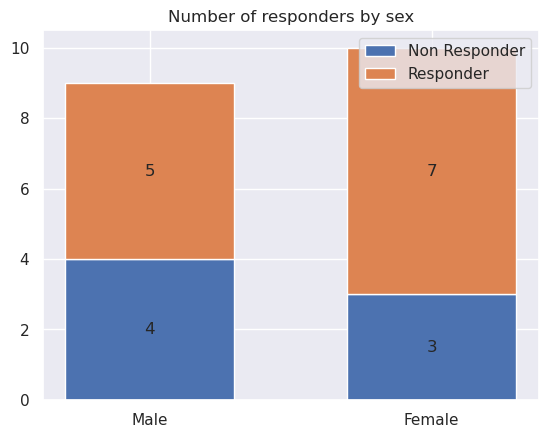

In [106]:
sexs = ("Male", "Female")
resps = ("Non Responder", "Responder")
width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(2)

M = pd.crosstab(index=df["resp"], columns=df["sex"]).to_numpy()

for resp_idx, resp in enumerate(resps):

    p = ax.bar(sexs, M[resp_idx, :], width, label=resp, bottom=bottom)
    bottom += M[resp_idx, :]

    ax.bar_label(p, label_type="center")

ax.set_title("Number of responders by sex")
ax.legend()

plt.savefig(folder_path+"/../imgs/stats/sex.png")
plt.show()

### Hypotesis definition

From:<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.barnard_exact.html#scipy.stats.barnard_exact

Null hypotesis: no difference between female and male of becoming non responders to VNS
Alternative hypothesis: female have lower chance of becoming non responders to VNS

probability $p_1$ of being non responder being male will be *greater* than the probability $p_2$ of being non responder being female. (This information can be get even from the graph, because the number of non responderes in males is grather than the female)

### Table organization

From the definition:<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.barnard_exact.html#scipy.stats.barnard_exact

In the row should be the output variable (being responder or not), in the columns the input variables (in this case the sex).

In [107]:
from scipy import stats

def printRes(a, p, method):
    print('significance=%.3f, p=%.3f' % (a, p))
    if p <= a:
        print(method+": Dependent")
    else:
        print(method+": Independent")

alpha = 0.05
obs = pd.crosstab(index=df["resp"], columns=df["sex"])
obs.index = ("nonResp", "Resp")
obs.columns = ("male", "female")
print(obs)
print()

# Chi squared
statistic, p_val, dof, exp_freq = stats.chi2_contingency(obs, True)
printRes(alpha, p_val, "Chi2")

# Barnard Exact
res = stats.barnard_exact(obs, alternative="greater")
printRes(alpha, res.pvalue, "Barnard")

# Fisher Exact
res = stats.fisher_exact(obs, alternative="greater")
printRes(alpha, res.pvalue, "Fisher")

         male  female
nonResp     4       3
Resp        5       7

significance=0.050, p=0.861
Chi2: Independent
significance=0.050, p=0.345
Barnard: Independent
significance=0.050, p=0.430
Fisher: Independent


The null hypotesis in not rejected: beeing male doesn't have a greater probability to be non responder

## Relationship between benzo and being responder

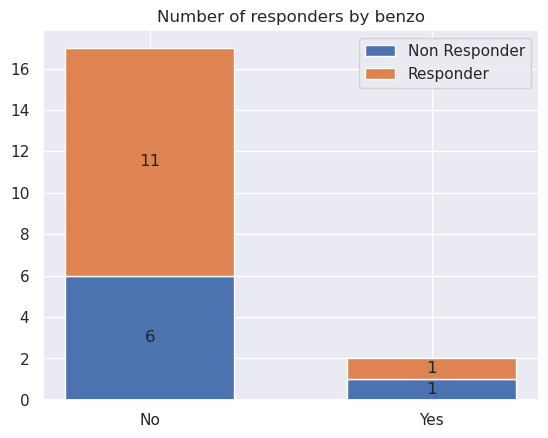

In [108]:
cat = ("No", "Yes")
resps = ("Non Responder", "Responder")
width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(2)

M = pd.crosstab(index=df["resp"], columns=df["benzo"]).to_numpy()

for resp_idx, resp in enumerate(resps):

    p = ax.bar(cat, M[resp_idx, :], width, label=resp, bottom=bottom)
    bottom += M[resp_idx, :]

    ax.bar_label(p, label_type="center")

ax.set_title("Number of responders by benzo")
ax.legend()

plt.show()

The Alternative hypotesis here will be (from the barplot) that not taking benzo have *less* probability to be non responder.

In [109]:
from scipy import stats

def printRes(a, p, method):
    print('significance=%.3f, p=%.3f' % (a, p))
    if p <= a:
        print(method+": Dependent")
    else:
        print(method+": Independent")

alpha = 0.05
obs = pd.crosstab(index=df["resp"], columns=df["benzo"])
obs.index = ("nonResp", "Resp")
obs.columns = ("no", "yes")
print(obs)
print()

# Chi squared
statistic, p_val, dof, exp_freq = stats.chi2_contingency(obs, True)
printRes(alpha, p_val, "Chi2")

# Barnard Exact
res = stats.barnard_exact(obs, alternative="less")
printRes(alpha, res.pvalue, "Barnard")

# Fisher Exact
res = stats.fisher_exact(obs, alternative="less")
printRes(alpha, res.pvalue, "Fisher")


         no  yes
nonResp   6    1
Resp     11    1

significance=0.050, p=1.000
Chi2: Independent
significance=0.050, p=0.565
Barnard: Independent
significance=0.050, p=0.614
Fisher: Independent


Our alternative hypotesis is rejected

## Relationship between the type of epilespy and being responder

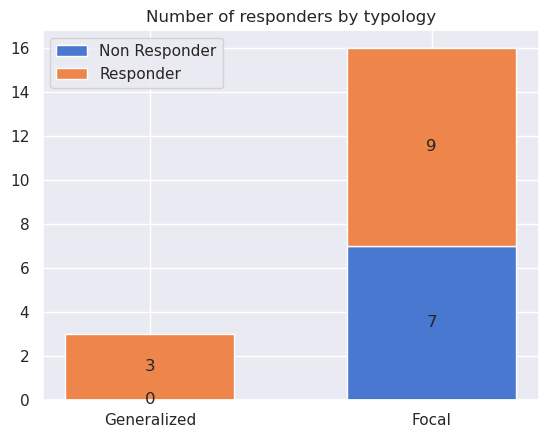

In [21]:
cat = ("Generalized", "Focal")
resps = ("Non Responder", "Responder")
width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(2)

M = pd.crosstab(index=df["resp"], columns=df["epilepsy_type"]).to_numpy()

for resp_idx, resp in enumerate(resps):

    p = ax.bar(cat, M[resp_idx, :], width, label=resp, bottom=bottom)
    bottom += M[resp_idx, :]

    ax.bar_label(p, label_type="center")

ax.set_title("Number of responders by typology")
ax.legend()

plt.show()

From the boxplot the alternative hypotesis will be that who has a generalized Epilepsy have *less* probability to be a non responder

In [22]:
from scipy import stats

def printRes(a, p, method):
    print('significance=%.3f, p=%.3f' % (a, p))
    if p <= a:
        print(method+": Dependent")
    else:
        print(method+": Independent")

alpha = 0.05
obs = pd.crosstab(index=df["resp"], columns=df["epilepsy_type"])
obs.index = ("nonResp", "Resp")
obs.columns = ("Generalized", "Focal")
print(obs)
print()

# Chi squared
statistic, p_val, dof, exp_freq = stats.chi2_contingency(obs, True)
printRes(alpha, p_val, "Chi2")

# Barnard Exact
res = stats.barnard_exact(obs, alternative="less")
printRes(alpha, res.pvalue, "Barnard")

# Fisher Exact
res = stats.fisher_exact(obs, alternative="less")
printRes(alpha, res.pvalue, "Fisher")

         Generalized  Focal
nonResp            0      7
Resp               3      9

significance=0.050, p=0.430
Chi2: Independent
significance=0.050, p=0.107
Barnard: Independent
significance=0.050, p=0.227
Fisher: Independent


Our alternative hypotesis is rejected

## Logistic Regression Relationship between Quantitative data and Categorical

### Age

/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, 

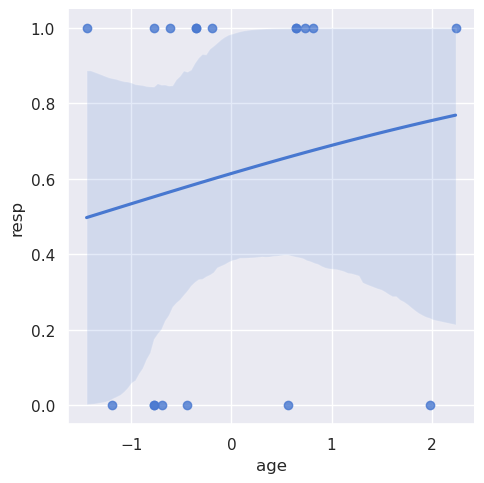

In [13]:
sns.lmplot(data=df_standardized, x="age", y="resp", logistic=True)

### Therapy duration

/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, 

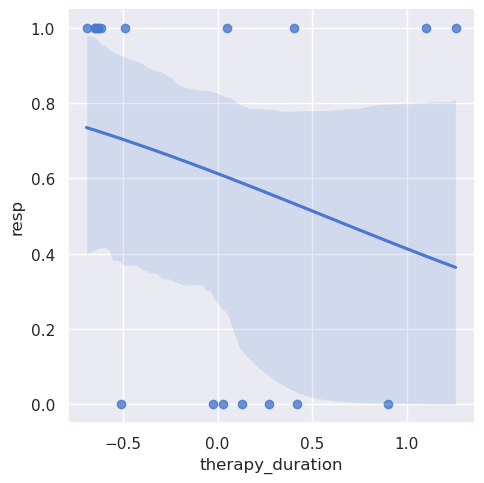

In [43]:
sns.lmplot(data=df, x="therapy_duration", y="resp", logistic=True)

### Onset Age


/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


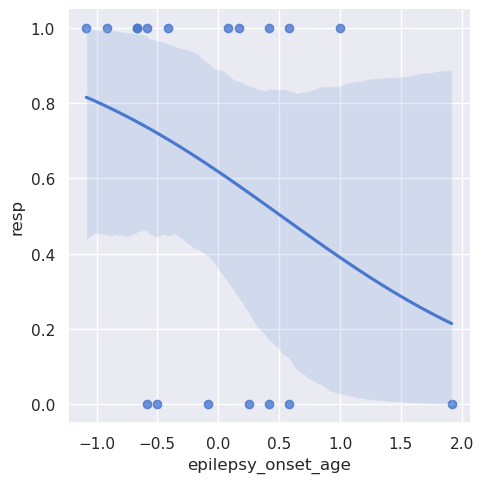

In [45]:
sns.lmplot(data=df, x="epilepsy_onset_age", y="resp", logistic=True)

### Epilepsy Duration

/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, 

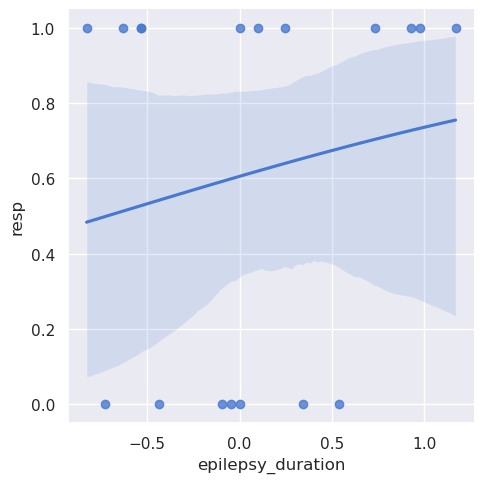

In [46]:
sns.lmplot(data=df, x="epilepsy_duration", y="resp", logistic=True)

## Relation between variables that should be similar

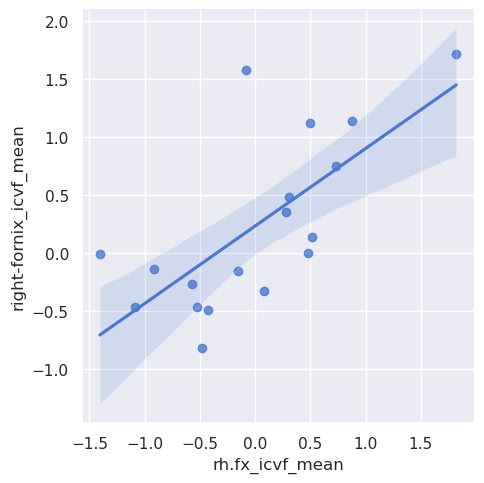

In [49]:
sns.lmplot(data=df, x="rh.fx_icvf_mean", y="right-fornix_icvf_mean", robust=False)

<Axes: xlabel='rh.fx_icvf_mean', ylabel='right-fornix_icvf_mean'>

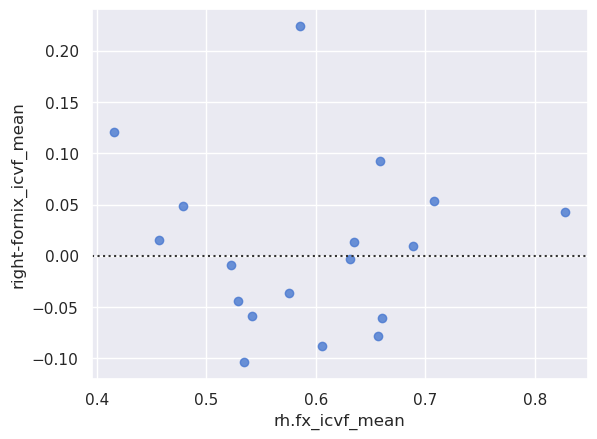

In [43]:
sns.residplot(data=df, x="rh.fx_icvf_mean", y="right-fornix_icvf_mean", robust=True)

# Comparisons of best region with [METRIC] that has a good separation between responders and not

For each tract we find the one that has the best FA that can divide the responders from the non responders

In [159]:
# Compute the p-values by mask and filter only <0.05

import scipy
from scipy.stats import mannwhitneyu, ttest_ind, shapiro, levene
from outliers import smirnov_grubbs as grubbs

X = df_standardized.drop(df.filter(regex=r'std|skew|_c0_|_c1_|_f0_|_f1_').columns, axis=1)

def f_test(group1, group2):
    if np.var(group1, ddof=1) >= np.var(group2, ddof=1):
        x = np.array(group1)
        y = np.array(group2)
    else:
        x = np.array(group2)
        y = np.array(group1)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) # calculate F test statistic
    nun = x.size-1 # define degrees of freedom numerator
    dun = y.size-1 # define degrees of freedom denominator
    p_value = 1-scipy.stats.f.cdf(f, nun, dun) # find p-value of F test statistic
    return f, p_value

def countOutliers(group):
    x = np.array(group)
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    nOutliers = 0
    nOutliers += (x > upper).sum()
    nOutliers += (x < lower).sum()

    return nOutliers

pval_thresh_5 = 0.05
pval_thresh_1 = 0.01

noResp = X[X["resp"] == 0]
resp = X[X["resp"] == 1]

res = {}

for mask in masks_name:
    features = X.filter(regex=f"{mask}").columns
    res[mask] = {}
    for alt in ["less", "greater"]:

        # # Checks for parametric test
        # ## shapiro null hypotheis that the data was drawn from a normal distribution
        # p_vals_shap_nonR = {col: shapiro(noResp[col]).pvalue for col in features}
        # p_vals_shap_R = {col: shapiro(resp[col]).pvalue for col in features}
        # ## f-test null hypothesis that the data has the same variance
        # p_vals_levene =  {col: levene(noResp[col], resp[col], center="median").pvalue for col in features}
        # ## Grubbs' test for outliers
        # bool_grubbs_nonR = {col: countOutliers(noResp[col]) > 0 for col in features}
        # bool_grubbs_R = {col: countOutliers(resp[col]) > 0 for col in features}
        # ## Check all the conditions for the parametric assumptions
        # isParametric = {col: True if p_vals_shap_nonR[col]>=pval_thresh_5 and p_vals_shap_R[col]>=pval_thresh_5 and p_vals_levene[col]>=pval_thresh_5 and bool_grubbs_nonR[col] == False and bool_grubbs_R[col] == False else False for col in features}

        # Compute the relative test depending the assumptions
        # p_vals_o = {col+"-ttest" if isParametric[col] else col+"-mannwhitneyu": ttest_ind(noResp[col], resp[col], equal_var=False, alternative=alt).pvalue if isParametric[col] else mannwhitneyu(noResp[col], resp[col], alternative=alt, method="auto").pvalue for col in features}
        p_vals_o = {col: mannwhitneyu(noResp[col], resp[col], alternative=alt, method="auto").pvalue for col in features}

        res[mask][alt] = {}

        p_vals = {k:v for k, v in sorted(p_vals_o.items(), key=lambda x: x[1]) if v <= pval_thresh_1}
        res[mask][alt]["0.01"] = p_vals

        p_vals = {k:v for k, v in sorted(p_vals_o.items(), key=lambda x: x[1]) if v > pval_thresh_1 and v <= pval_thresh_5}
        res[mask][alt]["0.05"] = p_vals

In [ ]:
X = df_standardized

features = X.filter(regex=r'mean|std|skew|voxVol|age|duration')
noResp = X[X["resp"] == 0]
resp = X[X["resp"] == 1]

p_vals_shap_nonR = {col: shapiro(noResp[col]).pvalue for col in features}
p_vals_shap_R = {col: shapiro(resp[col]).pvalue for col in features}
## f-test null hypothesis that the data has the same variance
p_vals_levene =  {col: levene(noResp[col], resp[col], center="median").pvalue for col in features}
## Grubbs' test for outliers
bool_grubbs_nonR = {col: countOutliers(noResp[col]) > 0 for col in features}
bool_grubbs_R = {col: countOutliers(resp[col]) > 0 for col in features}

nParametrics = 0
for col in features:
    if p_vals_shap_nonR[col]>=pval_thresh and p_vals_shap_R[col]>=pval_thresh and p_vals_levene[col]>=pval_thresh and bool_grubbs_nonR[col] == False and bool_grubbs_R[col] == False:
        nParametrics += 1

print(nParametrics)

1913


In [160]:
import json

pretty = json.dumps(res, indent=2)

print(pretty)

{
  "thalamus": {
    "less": {
      "0.01": {
        "left-thalamus_icvf_mean": 0.006489640390569183,
        "right-thalamus_odi_mean": 0.006489640390569183
      },
      "0.05": {
        "right-thalamus_icvf_mean": 0.011054219258553624,
        "left-thalamus_odi_mean": 0.022465666428514726
      }
    },
    "greater": {
      "0.01": {
        "left-thalamus_AD_mean": 0.003592125109152973,
        "left-thalamus_MD_mean": 0.006489640390569183,
        "left-thalamus_RD_mean": 0.006489640390569183,
        "right-thalamus_AD_mean": 0.006489640390569183,
        "right-thalamus_MD_mean": 0.008533777883623085
      },
      "0.05": {
        "right-thalamus_RD_mean": 0.011054219258553624,
        "left-thalamus_fextra_mean": 0.01792093355560848,
        "right-thalamus_fextra_mean": 0.01792093355560848,
        "right-thalamus_wAD_mean": 0.027824085099626895
      }
    }
  },
  "hippocampus": {
    "less": {
      "0.01": {},
      "0.05": {
        "left-hippocampus_fintra_mean

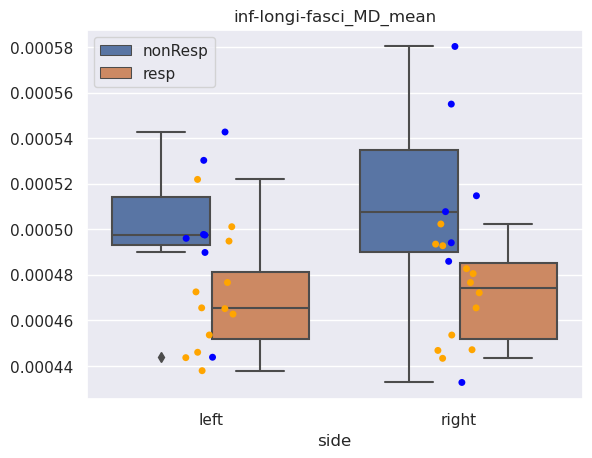

In [168]:
feature = "inf-longi-fasci_MD_mean"

cdf = df[[f"left-{feature}", f"right-{feature}", "resp"]]
# cdf = df[[f"lh.{feature}", f"rh.{feature}", "resp"]]

mdf = pd.melt(cdf, id_vars="resp", var_name="side")

ax = sns.boxplot(mdf, x="side", y="value", hue="resp")
g = sns.stripplot(mdf, x="side", y="value", hue="resp", palette=["blue", "orange"], legend=False)
ax.set_xticklabels(["left", "right"])
ax.set_ylabel(None)
ax.set_title(feature)
legend = plt.legend()
legend.get_texts()[0].set_text("nonResp")
legend.get_texts()[1].set_text("resp")

plt.savefig(f"{folder_path}/../imgs/stats/both-{feature}.png", pad_inches=0, bbox_inches="tight", dpi=150)

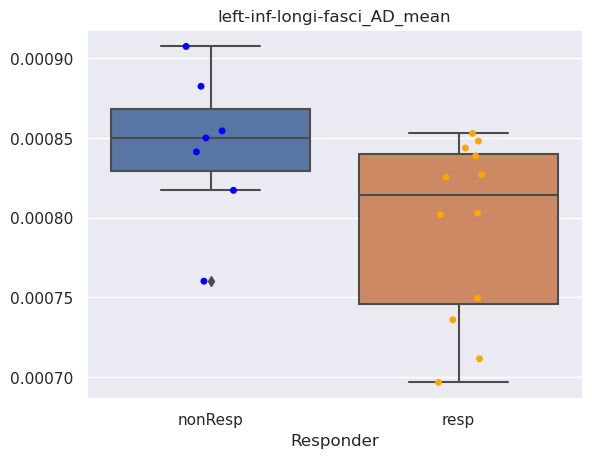

In [171]:
feature = "left-inf-longi-fasci_AD_mean"
ax = sns.boxplot(df, y=feature, x="resp")
sns.stripplot(df, y=feature, x="resp", hue="resp", palette=["blue", "orange"], legend=False)

ax.set_xlabel("Responder")
ax.set_ylabel(None)
ax.set_title(feature)
ax.set_xticklabels(["nonResp", "resp"])

plt.savefig(f"{folder_path}/../imgs/stats/{feature}.png", pad_inches=0, bbox_inches="tight", dpi=150)


In [63]:
feature = "left-postThalRadiation-parital_fintra_mean"
sns.violinplot(df_standardized, y=feature, x="resp", inner="point", cut=0, scale="area")
plt.savefig(f"{folder_path}/../imgs/stats/{feature}.png", pad_inches=0, bbox_inches="tight", dpi=150)

In [27]:
features = df.filter(regex=r'amygdala').columns
alt = "two-sided"

In [31]:
from scipy.stats import mannwhitneyu

pval_thresh = 0.05

noResp = df[df["resp"] == 0]
resp = df[df["resp"] == 1]

p_vals = {col: mannwhitneyu(noResp[col], resp[col], alternative=alt, method="auto").pvalue for col in features}

p_vals = {k:v for k, v in sorted(p_vals.items(), key=lambda x: x[1]) if v <= pval_thresh}
p_vals

{'right-amygdala_RD_skew': 0.015397184514831573,
 'left-amygdala_MD_mean': 0.02042483660130719,
 'left-amygdala_RD_mean': 0.02042483660130719,
 'left-amygdala_AD_mean': 0.026772247360482657,
 'left-amygdala_wFA_mean': 0.03456510809451986,
 'left-amygdala_wfvf_skew': 0.03456510809451986,
 'left-amygdala_FA_mean': 0.04411764705882353,
 'right-amygdala_AD_std': 0.04411764705882353}

In [32]:
from scipy.stats import ttest_ind

pval_thresh = 0.05

noResp = df[df["resp"] == 0]
resp = df[df["resp"] == 1]

p_vals = {col: ttest_ind(noResp[col], resp[col], equal_var=False, alternative=alt).pvalue for col in features}

p_vals = {k:v for k, v in sorted(p_vals.items(), key=lambda x: x[1]) if v <= pval_thresh}
p_vals

{'right-amygdala_RD_skew': 0.024072461599452376,
 'right-amygdala_wRD_skew': 0.027053454819430056,
 'left-amygdala_wFA_mean': 0.02900086191896005,
 'left-amygdala_RD_mean': 0.04040772831044827,
 'left-amygdala_MD_mean': 0.0423904875249251,
 'right-amygdala_wMD_skew': 0.04876283456487818}

In [9]:
from scipy.stats import f_oneway

features = df.columns
pval_thresh = 0.05

noResp = df[df["respPart"] == 0]
respPart = df[df["respPart"] == 1]
resp = df[df["respPart"] == 2]

p_vals = {col: f_oneway(noResp[col], respPart[col], resp[col]).pvalue for col in features}

p_vals = {k:v for k, v in sorted(p_vals.items(), key=lambda x: x[1]) if v <= pval_thresh}
p_vals

/home/michele/anaconda3/envs/dMRI/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


{'resp': 0.0,
 'respPart': 0.0,
 'lh.fx_icvf_skew': 0.0002699133744376709,
 'right-fornix_RD_mean': 0.0008508033822484957,
 'lh.slf3_frac_csf_mf_std': 0.0010316591184765685,
 'lh.slf3_frac_ftot_std': 0.0010316591184765685,
 'cc.bodypf_odi_skew': 0.0015965117865141805,
 'left-fornix_RD_mean': 0.0018366926684175576,
 'right-fornix_MD_mean': 0.002858886976033674,
 'left-accumbens-area_frac_c1_std': 0.00324233939297154,
 'left-antThalRadiation_frac_f1_mean': 0.003411808174494416,
 'left-pallidum_icvf_std': 0.0036654887899183813,
 'left-putamen_frac_csf_mf_std': 0.0039628685641786,
 'left-putamen_frac_ftot_std': 0.0039628685641786,
 'rh.emc_AD_mean': 0.0040519573028207165,
 'right-inf-longi-fasci_odi_std': 0.0043260967288880885,
 'right-antThalRadiation_fextra_std': 0.0043586055421885464,
 'left-fornix_MD_mean': 0.0045132087943020645,
 'lh.slf1_RD_skew': 0.004966054905029886,
 'right-putamen_RD_mean': 0.004966961533793896,
 'right-putamen_MD_mean': 0.00612883136627113,
 'right-putamen_frac_

In [126]:
from scipy.stats import kruskal

features = df.columns
pval_thresh = 0.05

noResp = df[df["respPart"] == 0]
respPart = df[df["respPart"] == 1]
resp = df[df["respPart"] == 2]

p_vals = {col: kruskal(noResp[col], respPart[col], resp[col]).pvalue for col in features}

p_vals = {k:v for k, v in sorted(p_vals.items(), key=lambda x: x[1]) if v <= pval_thresh}
p_vals

{'respPart': 0.00020346836901064455,
 'resp': 0.00020346836901064563,
 'lh.fx_icvf_skew': 0.002506866268390786,
 'lh.slf1_RD_skew': 0.0030711159379943733,
 'lh.cst_odi_std': 0.0031196011392614345,
 'left-pallidum_fextra_std': 0.0034986137121953893,
 'right-inf-longi-fasci_odi_std': 0.0036258222621360662,
 'right-fornix_RD_mean': 0.00422211730225809,
 'right-putamen_wFA_std': 0.005124053141987317,
 'left-pallidum_icvf_std': 0.005646656215278148,
 'cc.bodypf_odi_skew': 0.006137373506640009,
 'right-fornix_MD_mean': 0.006137373506640009,
 'left-accumbens-area_wFA_std': 0.006987313384752869,
 'left-fornix_MD_mean': 0.007254994411756581,
 'left-fornix_RD_mean': 0.007254994411756581,
 'left-putamen_frac_csf_mf_std': 0.0074765040074278,
 'left-putamen_frac_ftot_std': 0.0074765040074278,
 'left-antThalRadiation_frac_f1_mean': 0.007575529112428889,
 'rh.cbd_frac_csf_mf_mean': 0.008369107591561977,
 'rh.cbd_frac_ftot_mean': 0.008369107591561977,
 'rh.ar_AD_std': 0.00888796073765363,
 'right-pall

# Simple Exploratory Data Analysis

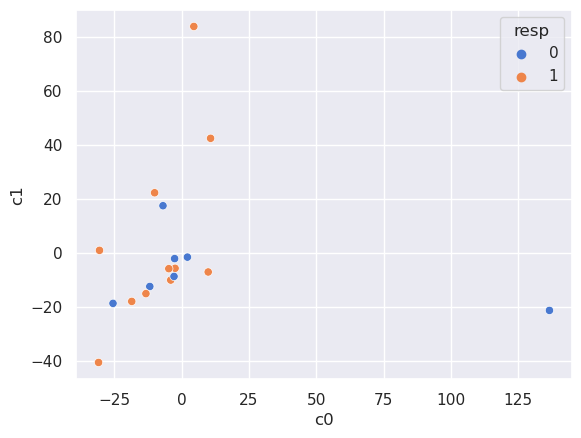

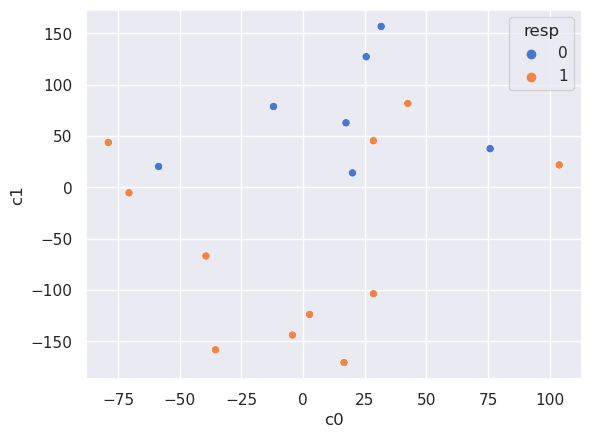

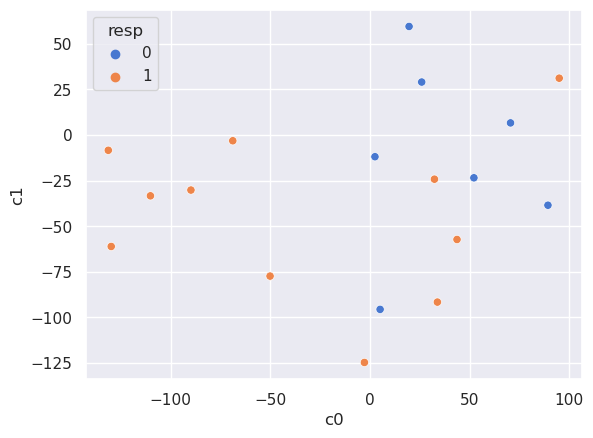

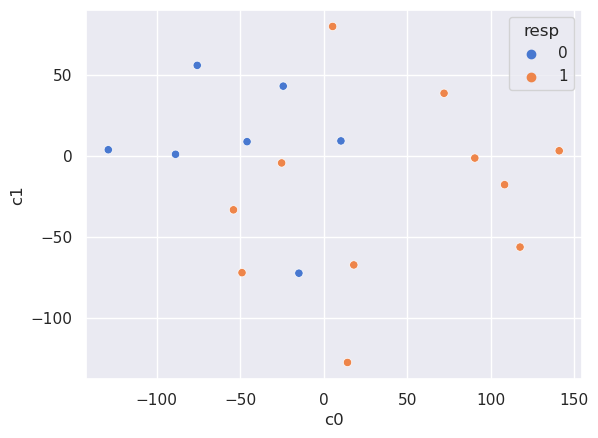

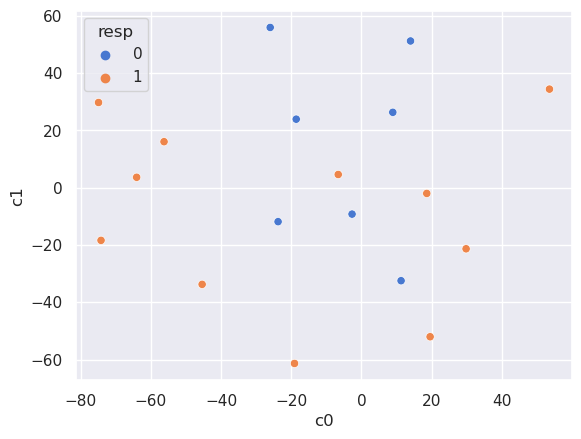

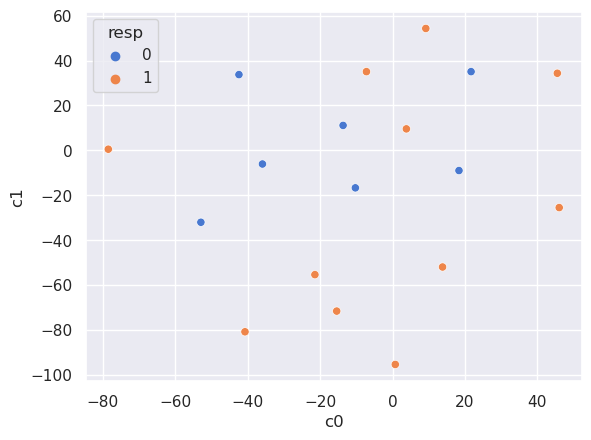

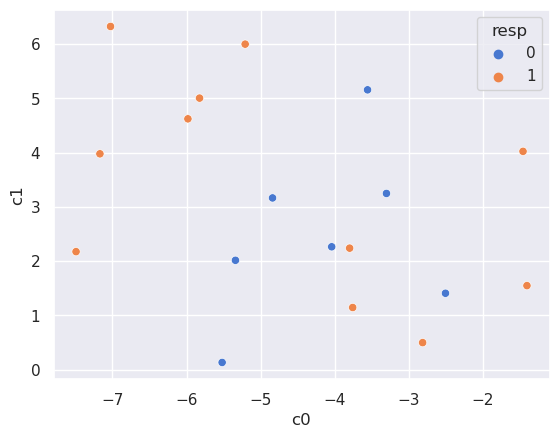

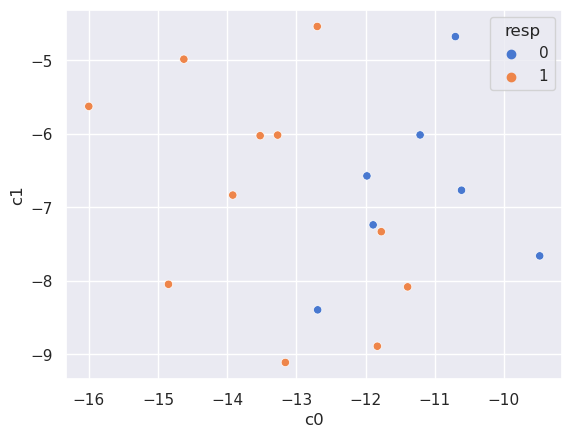

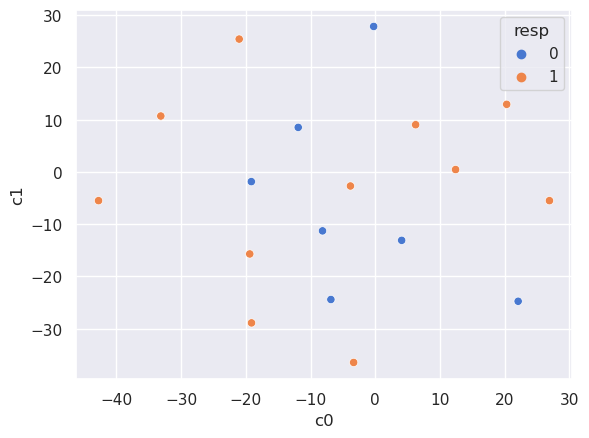

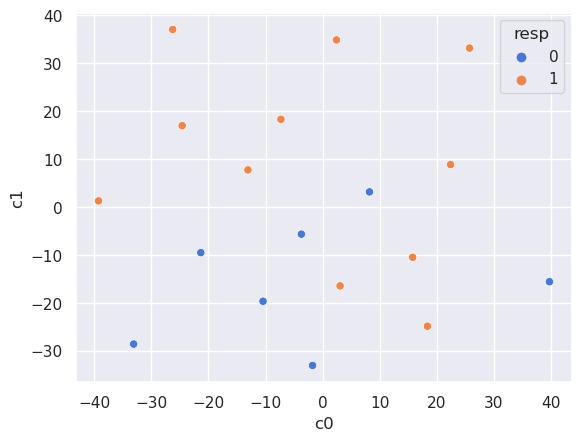

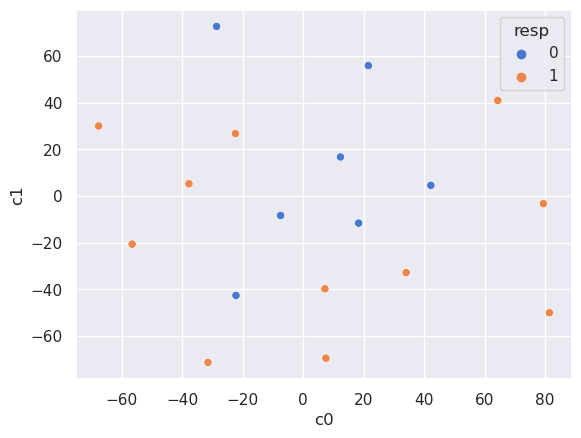

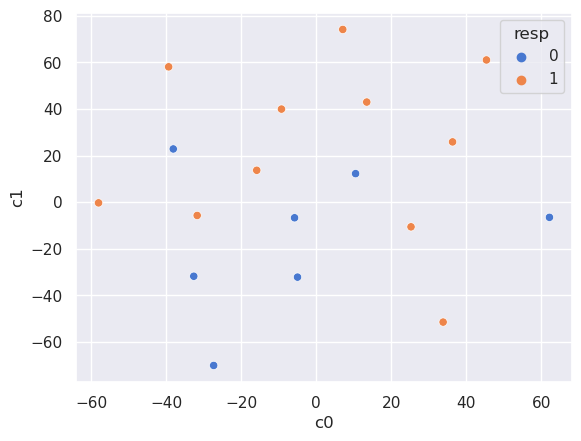

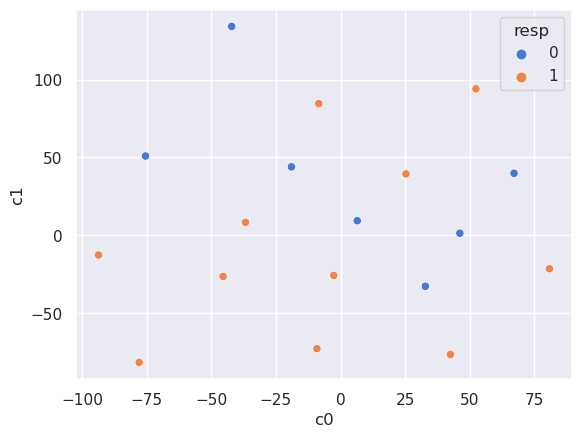

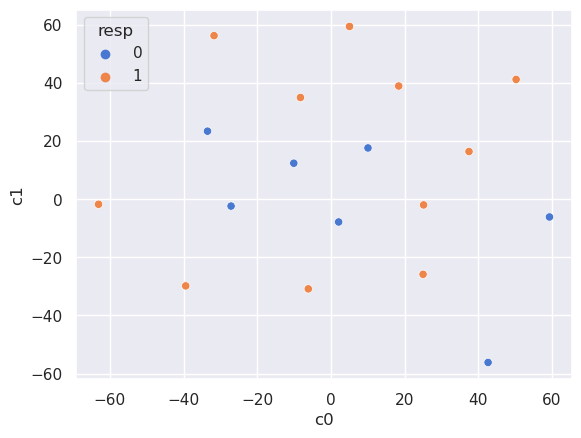

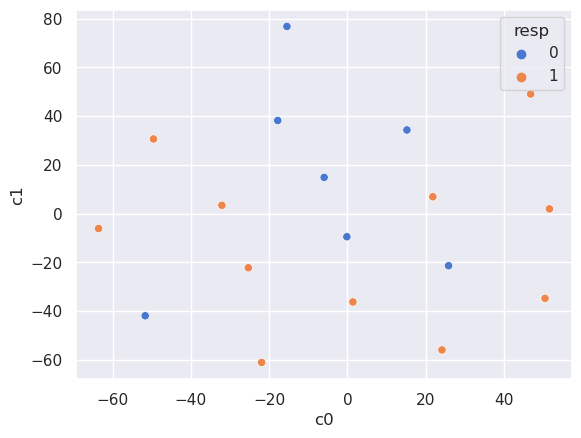

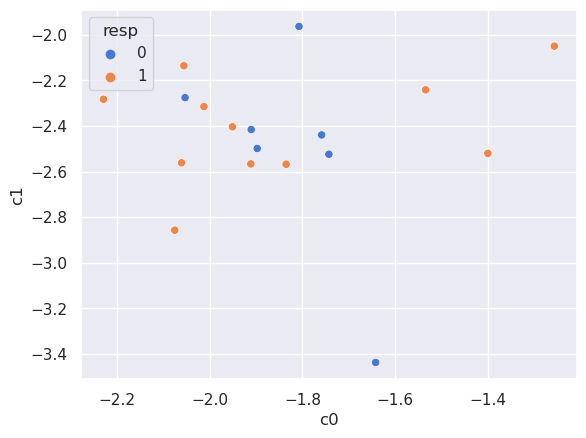

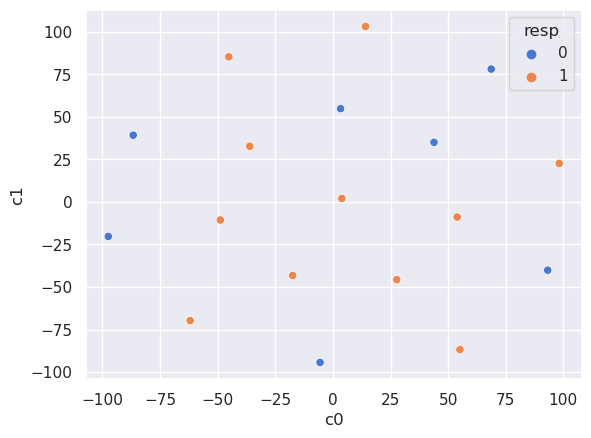

In [63]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = df

pca = PCA(
    n_components=2,
    svd_solver="full",
)
Y_pca = pd.DataFrame(pca.fit_transform(X), index=df.index, columns=["c0", "c1"])
Y_pca = pd.concat([Y_pca, df["resp"]], axis=1)

sns.scatterplot(Y_pca, x="c0", y="c1", hue="resp")

for perplexity in range(2, df.shape[0]):

    tSNE = TSNE(
        n_components=2,
        perplexity=perplexity, # to change
        learning_rate="auto", # epslon
        n_iter=5000, # per essere sicuro delle convergenza
        #n_iter_without_progress=3000, # per stopparlo prima
        init="pca",
        method="exact", # it's slowert but out dataset is small so we can affort it
        n_jobs=-1, # run in parallel
    )
    Y_tSNE = pd.DataFrame(tSNE.fit_transform(X),index=df.index, columns=["c0", "c1"])
    Y_tSNE = pd.concat([Y_tSNE, df["resp"]], axis=1)

    plt.figure()
    sns.scatterplot(Y_tSNE, x="c0", y="c1", hue="resp")

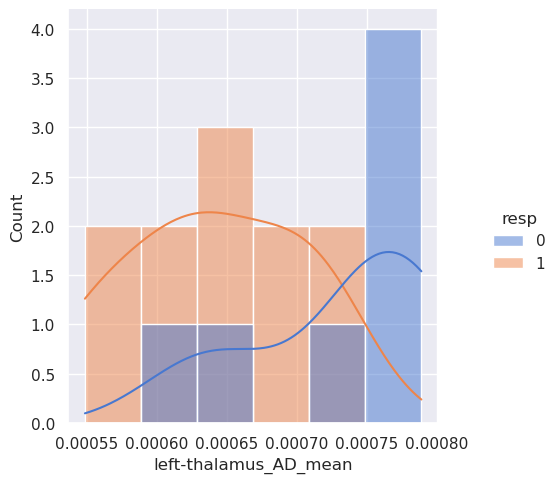

In [43]:
sns.displot(df, x="left-thalamus_AD_mean", hue="resp", kde=True)

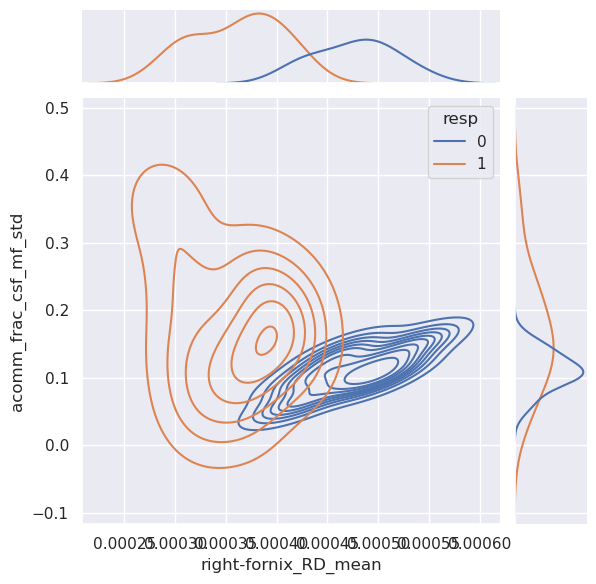

In [89]:
sns.jointplot(
    data=df,
    x='right-fornix_RD_mean', y='acomm_frac_csf_mf_std', hue="resp",
    kind="kde"
)

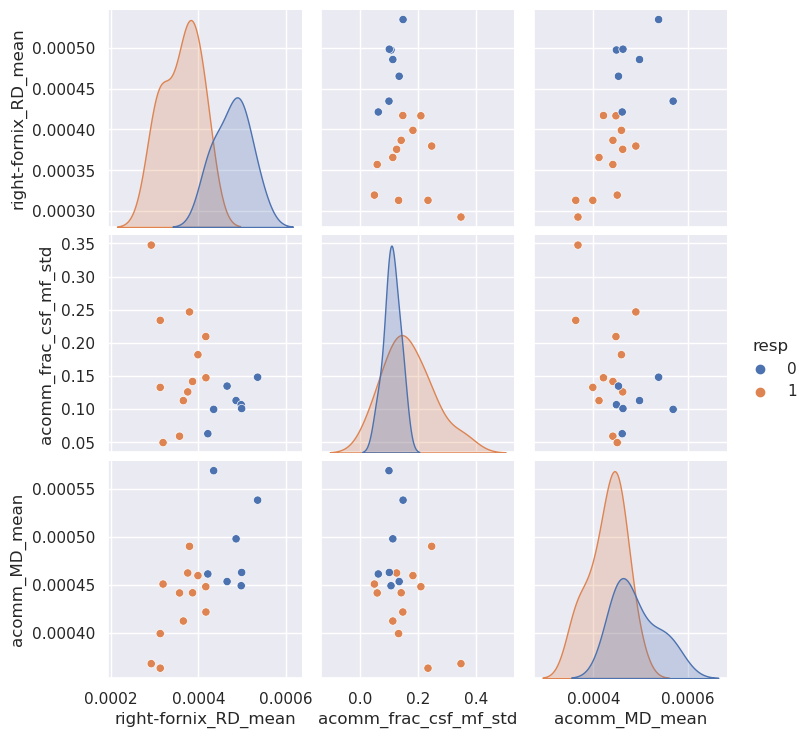

In [86]:
toPlot = ['right-fornix_RD_mean', 'acomm_frac_csf_mf_std', 'acomm_MD_mean']
ax = sns.pairplot(df, hue="resp", x_vars=toPlot, y_vars=toPlot)

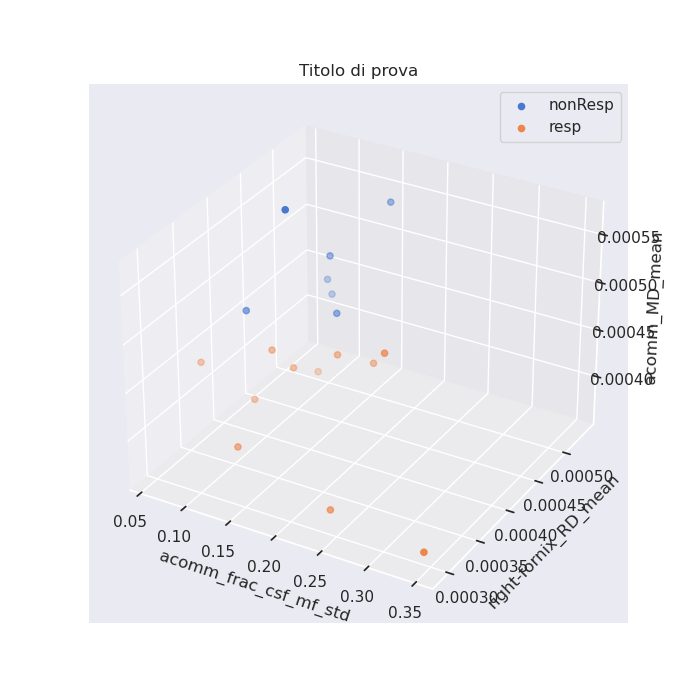

In [139]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# colors = ["red", "green"]

fig = plt.figure(figsize=(6,6))
fig.set_size_inches(7,7)
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Titolo di prova")
ax.set_xlabel("acomm_frac_csf_mf_std")
ax.set_ylabel("right-fornix_RD_mean")
ax.set_zlabel("acomm_MD_mean")
# ax.set_xlim(0, 50)
# ax.set_ylim(0, 15)
# ax.set_zlim(30, 80)
# ax.set_xticks([10, 30, 50])
# ax.grid(False)

for i, lab in enumerate(["nonResp", "resp"]):
    sub_df = df[df["resp"] == i]
    xs = sub_df["acomm_frac_csf_mf_std"]
    ys = sub_df["right-fornix_RD_mean"]
    zs = sub_df["acomm_MD_mean"]

    scatter = ax.scatter(xs, ys, zs, marker="o", label=lab)
    # c := cambia colore
    # s := cambia dimensione del pallino (può anche dipendere da una variabile)


ax.legend(loc="best")

# cb = plt.colorbar(scatter, pad=0.2)
# cb.set_ticks([0, 1])
# cb.set_ticklabels(["nonResp", "Resp"])

plt.show()